<a href="https://colab.research.google.com/github/diegoestradaXO/Proyecto2-Data-Science/blob/master/Proyecto_2_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Data Science
### Detección de COVID-19 en radiografías de tórax

Universidad del Valle de Guatemala \\
Curso: Data Science \\
Catedrática: Lynette García

### Autores:

Andrea Elías - 17048<br>
Diego Estrada - 18540<br>
Saúl Contreras - 18409 <br>
Randy Venegas - 18341

## Situación  Problemática:
Remontando al mes de diciembre de 2019, se identificó el primer caso de covid-19 en la ciudad de Wuhan en la República de China. Esto empezó a ser algo muy contagioso cosa que nadie estaba preparado en esa fecha, destacando los metros y los transportes públicos, se propagó de una manera exponencial al punto de salirse del mismo país a llegar a distintos continentes, para la fecha del 13 de marzo se observó el primer caso en la ciudad de Guatemala, esto conlleva a un cierre del país de 40 días y posteriormente se abrieron las puertas a los trabajos presenciales ya la mayor parte de la comunidad económicamente estaba muy baja, a lo que posteriormente se abren las medidas socio-sanitarias que ayudarían a una limpieza brindando gel antibacterial para todo centro comercial, supermercados y demás lugares muy transitados. Esto provocó que todos los estudios y diversos trabajos presenciales se sustituyeran en virtuales generando una alta demanda a los programas como: Zoom, Google meets, Discord, etc. Eso fue ayudando a disminuir los posibles contagios que se pudieron dar en esos tiempos, a pesar de eso, las estadísticas de contagios fueron aumentando ya que con el paso del tiempo varios tipos de variantes llamados: Delta, Alpha, Gamma y Beta. Estos se pueden ir expandiendo a tal punto de crear otras. 


## Problema científico
La enfermedad del coronavirus (COVID-19) que es provocada por el virus llamado SARS-CoV-2 puede ser diagnosticado mediante la prueba PCR, en donde se recolecta una muestra nasofaríngea al introducir un hisopo largo en una de las fosas nasales. A partir de esta muestra se realiza un análisis molecular, en el que se extrae el material genético de la muestra y se amplifica usando la enzima ADN polimerasa. A través de sondas fluorescentes es posible determinar si el paciente tiene el virus o no. Este proceso de detección puede llevar horas o incluso días dependiendo de qué tan exhaustivo se haga, sin embargo, se sabe que radiografías del tórax del paciente pueden dar indicios de la presencia del virus en el organismo, y estas radiografías pueden obtenerse en cuestión de minutos. Estas imágenes pueden mostrar inflamaciones e hinchazones del tejido pulmonar, así como patrones intersticiales. Para apoyar y agilizar la detección del virus en las personas, se propone utilizar técnicas de ciencia de datos para predecir y clasificar para cada una de las imágenes provistas por la Society for Imaging Informatics in Medicine (SIIM), si hubo hallazgos o no, y etiquetar por: negativo a neumonía, apariencia típica, indeterminada o atípica.


## Objetivos
- General
  - Identificar y localizar anomalías causadas por COVID-19 en radiografías de tórax
- Secundarios:
  - Generar modelos y predicciones sobre las anomalías causadas por COVID-19 con el uso de Data Science, haciendo uso de las técnicas de filtrado y procesamiento de imágenes 
  - Agilizar el proceso de detección de COVID-19, identificando patrones intersticiales por medio del análisis de imágenes de radiografías de tórax.
Etiquetar las imágenes de radiografías de tórax por; negativo a neumonía, apariencia típica, indeterminada o atípica.

## Descripción de los datos:
Hay dos conjuntos de datos: study level e image level.

#### Study level:

Datos:

El nivel de estudio es un problema de clasificación, una radiografía puede tener una de las 
4 clases siguientes: 
- Negativo: Sin COVID, pulmones limpios
- Típicos: Hallazgos comunes en COVID-19
- Atípico: Hallazgos poco frecuentes en COVID-19
- Indeterminado: Los hallazgos que se encontraron suelen ser comunes en COVID-19, pero
también se observa en otra infecciones respiratorias


Procedimiento para limpieza:
-Calcular la variable “class” que identificará a que clase de las descritas anteriormente 
mencionadas. 
-Determinar la frecuencia de cada clase
-Gráfica de barras con las frecuencias y clases

#### Image level:

Datos:

Una  radiografía  puede  tener  cualquiera  de  las  dos  clases  siguientes  en función de 
los cuadros delimitadores o no. Puede haber 0 o más información de cuadro delimitador
para cada imagen, dada en formato x1, y1, W, H para cada cuadro.

- none: para las imágenes que no tienen información de cuadro delimitador 
(normalmente, que también son negativas a nivel de estudio).
- opacidad: para las imágenes que tienen cuadros delimitadores, tienen "opacidad" 
a nivel de imagen. 

Procedimiento para limpieza:
Calcular la variable “class” que identificará a que clase de las descritas anteriormente 
mencionadas. 
Determinar la frecuencia de cada clase
Gráfica de barras con las frecuencias y clases
Unir ambos datasets



##Análisis exploratorio

### Importación de librerías e instalación de dependencias

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
pip install pydicom

In [ ]:
pip install python-gdcm

     |████████████████████████████████| 9.4 MB 4.8 MB/s 


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     | 34.6 MB 520 kB/s
     |████████████████████████████████| 10.1 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 56.6 MB/s 
     |████████████████████████████████| 102 kB 50.9 MB/s 
     |████████████████████████████████| 675 kB 45.4 MB/s 
     |████████████████████████████████| 3.1 MB 75.1 MB/s 
     |████████████████████████████████| 62 kB 863 kB/s 
     |████████████████████████████████| 812 kB 72.1 MB/s 
     |████████████████████████████████| 28.5 MB 44 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=c35c04a3b4551bb64b2f6c4cd664f2a29d323c8aa60a4d6e8662b9090ffe499d
  Stored in directory: /tmp/pip-ephem-wheel-cache-g2on9kea/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ea9e173233cd3ecce4a832027eee5c45e5e797ebf4fd418114f2353d457934cb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [ ]:
import pandas as pd
import os
import math
from PIL import Image
import cv2
import numpy as np
import sys 
import matplotlib.pyplot as plt
import pydicom

#import gdcm

from pandas import DataFrame

from matplotlib.lines import Line2D
import seaborn as sns
import plotly.express as px


import glob
import cv2

from tqdm.notebook import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut
from skimage import exposure
from pydicom import read_file
from dicom import  read_file

from pandas_profiling import ProfileReport


### Carga de datos

In [ ]:
data_study_level = pd.read_csv('/content/drive/My Drive/datasets/siim-covid-19/train_study_level.csv')

In [ ]:
data_image_level = pd.read_csv('/content/drive/My Drive/datasets/siim-covid-19/train_image_level.csv')

El shape establece cuantos datos contiene el conjunto, y cuantas columnas posee. Para el caso del conjunto de datos de nivel de imagen, hay 6334 filas y 4 columnas.

In [ ]:
data_image_level.shape


(6334, 4)

Para el conjunto de datos a nivel de estudio, se observa que se cuenta con 6054 filas y 5 columnas

In [ ]:
data_study_level.shape


(6054, 5)

A continuación se presentan las cinco columnas y primeras cinco filas del dataset a nivel de estudio.

In [ ]:
data_study_level.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


A continuación se presentan las cinco columnas y primeras cinco filas del dataset a nivel de imagen.

In [ ]:
data_image_level.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


Como se puede observar, hay más datos de datos a nivel de imagen (6334) que a nivel de estudio (6054), y esto se debe a que múltiples imágenes pueden pertenecer a un mismo elemento de estudio. Cabe mencionar también que en la tabla de image level, una de las columnas que se pueden encontrar es el id de study. Más adelante se juntarán ambos datasets con la condición de que el *StudyInstanceUID* coincida con el *id* del dataset de nivel de estudio, y de esta manera todo esté unificado y el acceso sea más fácil.

## Study level

El nivel de estudio es un problema de clasificación, una radiografía puede tener una de las 
4 clases siguientes: 
- Negativo: Sin COVID, pulmones limpios,
- Típicos: Hallazgos comunes en COVID-19,
- Atípico: Hallazgos poco frecuentes en COVID-19,
- Indeterminado: Los hallazgos que se encontraron suelen ser comunes en COVID-19, pero también se observa en otra infecciones respiratorias


Calcular la variable class que identificará a que clase de las descritas anteriormente 
mencionadas. 


In [ ]:
data_study_level['class'] = 'Typical'
data_study_level.loc[data_study_level['Negative for Pneumonia']==1, 'class'] = 'Negative'
data_study_level.loc[data_study_level['Indeterminate Appearance']==1, 'class'] = 'Indeterminate'
data_study_level.loc[data_study_level['Atypical Appearance']==1, 'class'] = 'Atypical'

data_study_level.head(3)

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,class
0,00086460a852_study,0,1,0,0,Typical
1,000c9c05fd14_study,0,0,0,1,Atypical
2,00292f8c37bd_study,1,0,0,0,Negative


Determinar la frecuencia de cada clase

In [ ]:
data_study_level.groupby(['class']).size().reset_index(name='counts')

,class,counts
0,Atypical,474
1,Indeterminate,1049
2,Negative,1676
3,Typical,2855


Gráfica de barras con las frecuencias y clases


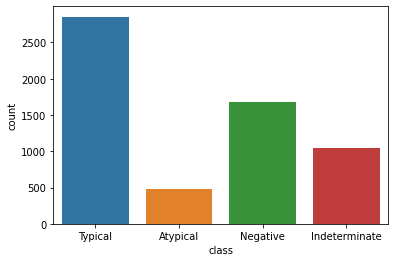

In [ ]:
import seaborn as sns

ax = sns.countplot(x="class",data=data_study_level)

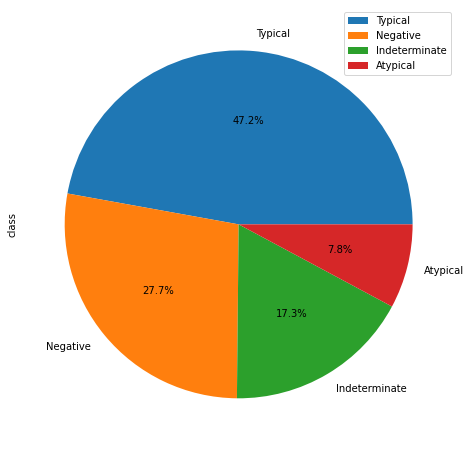

In [ ]:
data_study_level["class"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

Se observa que la clase de apariencia típica predomina frente a las otras 3 clases.

#### Profiler para Study Level

In [ ]:
study_level_profiler = ProfileReport(data_study_level, title="train_study_level_report")
study_level_profiler

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Image Level

Una  radiografía  puede  tener  cualquiera  de  las  dos  clases  siguientes  en función de 
los cuadros delimitadores o no. Puede haber 0 o más información de cuadro delimitador
para cada imagen, dada en formato x1, y1, W, H para cada cuadro.

none: para las imágenes que no tienen información de cuadro delimitador 
(normalmente, que también son negativas a nivel de estudio).
opacidad: para las imágenes que tienen cuadros delimitadores, tienen "opacidad" 
a nivel de imagen. 



Calcular la variable “class” que identificará a que clase de las descritas anteriormente mencionadas. 


In [ ]:
data_image_level['class'] = data_image_level.label.apply(lambda x: x.split()[0])

Determinar la frecuencia de las clase

In [ ]:
data_image_level.groupby(['class']).size().reset_index(name='counts')

,class,counts
0,none,2040
1,opacity,4294


Gráfica de barras con las frecuencias y clases

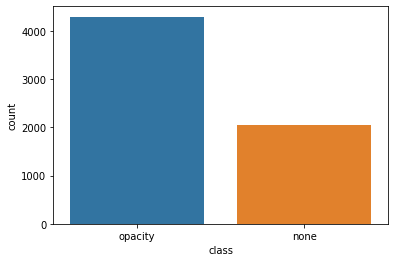

In [ ]:
ax = sns.countplot(x="class",data=data_image_level)

#### Profiler para Image Level

In [ ]:
image_level_profiler = ProfileReport(data_image_level, title="train_image_level_report")
image_level_profiler

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Unir ambos datasets

In [ ]:
data_study_level['StudyInstanceUID'] = data_study_level['id'].apply(lambda x: x.replace('_study', ''))
train_df = data_image_level.merge(data_image_level, on='StudyInstanceUID')
train_df.sample(3)

,id_x,boxes_x,label_x,StudyInstanceUID,class_x,id_y,boxes_y,label_y,class_y
2607,b5aa6189d142_image,NaN,none 1 0 0 1 1,28e7495f0382,none,b5aa6189d142_image,NaN,none 1 0 0 1 1,none
87,01e7fdcf87fc_image,"[{'x': 264.22548, 'y': 459.36994, 'width': 491...",opacity 1 264.22548 459.36994 755.69106 1342.0...,570fd6af9eab,opacity,01e7fdcf87fc_image,"[{'x': 264.22548, 'y': 459.36994, 'width': 491...",opacity 1 264.22548 459.36994 755.69106 1342.0...,opacity
1638,30124d722883_image,"[{'x': 295.7476, 'y': 832.03664, 'width': 705....",opacity 1 295.7476 832.03664 1001.398999999999...,018c96c9aeff,opacity,30124d722883_image,"[{'x': 295.7476, 'y': 832.03664, 'width': 705....",opacity 1 295.7476 832.03664 1001.398999999999...,opacity


### Visualización de imágenes

Para el despliegue de imagenes, se esta haciendo uso de las librerias tensorflow y tensorflow.io en su modulo tfio.image.decode_decode_dicom_image el cual sera utilizado para la decodificacion de los archivos dicom extraidos del data set.



In [ ]:
!pip install tensorflow-io

     |████████████████████████████████| 22.7 MB 33.5 MB/s 
     |████████████████████████████████| 2.3 MB 40.0 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_io as tfio

Se decodifican los archivos dcm para ser desplegados en formato jpg, obteniendo la imagen original y una en formato comprimido lossy

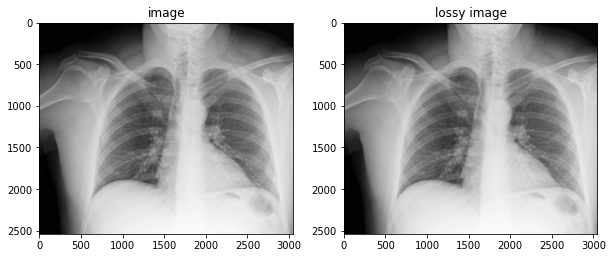

In [ ]:
image_bytes = tf.io.read_file('/content/drive/My Drive/datasets/siim-covid-19/Images/f6293b1c49e2.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

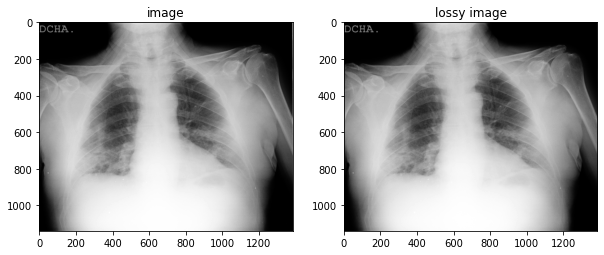

In [ ]:
image_bytes = tf.io.read_file('/content/drive/My Drive/datasets/siim-covid-19/Images/f8ded2e15154.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

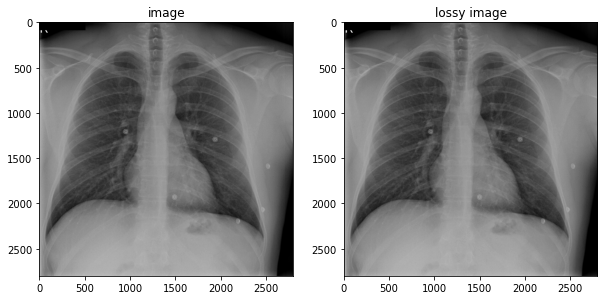

In [ ]:
image_bytes = tf.io.read_file('/content/drive/My Drive/datasets/siim-covid-19/Images/136af218f8df.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

## Hallazgos y conclusiones sobre primera etapa del proyecto
- Se tienen más datos de entrenamiento para las imágenes con hallazgos típicos y negativos que para las otras dos clases. 
- Para los hallazgos atípicos se tienen muy pocos datos de entrenamiento en comparación con las demás clases.  
- En base al análisis realizado, se determinó que el conjunto de datos dado se encuentra desbalanceado, por lo cual se debe de estandarizar la información dada, por lo cual podria ser necesario el ajustar parametros, crear muestras artificiales y/o modificar el dataset.
- Debido a la magnitud de las imágenes contenidas dentro del dataset, se deberá de hallar la manera de comprimir las mismas en orden de obtener un modelo de predicción que no requiera un tiempo largo de ejecución.

